## NAME: THOMAS AMO KYEIMIAH 
-----

```STUDENT ID: 261121054```

```COURSE: ATOC 558```

```LAB 1```


In [1]:
# importing libraries
from numpy import *
import matplotlib.pyplot as  plt
from scipy.fftpack import fft, ifft, fftfreq

```Data Analysis```

In [2]:
# Define the spatial grid
Lx = 1  # domain size
Nx = 96  # number of spatial grid points
dx = Lx / (Nx - 1)  # spatial grid spacing
x = linspace(0, Lx, Nx)

# Define the advection velocity
c = 0.01  # m/s

# Define the initial condition
a = 0.1 * Lx
f = exp(-((x - Lx/2)**2) / a**2)

# Define the time
t = 0.5 * Lx / c

# Define the Fourier Transform of the initial condition
F = fft(f)

# Define the Fourier Transform of the spatial operator
k = 2*pi*fftfreq(Nx, d=dx)
K = 1j*k

# Define the time-stepping operator
t_step = exp(-c*t*K)

# Define the Fourier Transform of the analytical solution
Psi = t_step*F

# Define the analytical solution
psi = ifft(Psi)

```Plotting```

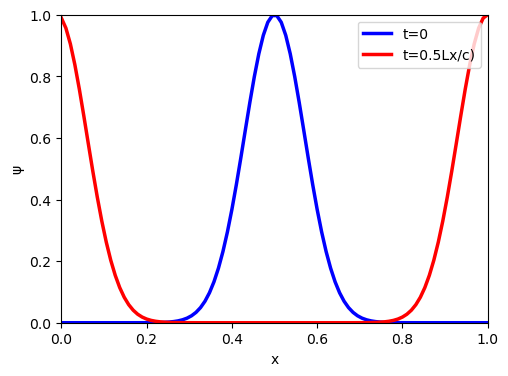

In [3]:
# Plot the solution
plt.figure(figsize=(5.5,4))
plt.plot(x, f, label='t=0', color='blue', linewidth=2.5)
plt.plot(x, psi, label='t=0.5Lx/c)', color='red', linewidth=2.5)
plt.xlim([0, max(x)])
plt.ylim([0, max(psi)])
plt.xlabel('x')
plt.ylabel('ψ')
plt.legend(loc='upper right', borderpad=0.4)
plt.savefig('lab1.jpg', dpi=300)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the spatial grid
Lx = 1  # domain size
Nx = 96  # number of spatial grid points
dx = Lx / (Nx - 1)  # spatial grid spacing
x = np.linspace(0, Lx, Nx)

# Define the advection velocity
c = 0.01  # m/s

# Define the initial condition
a = 0.1 * Lx
f = np.exp(-((x - Lx/2)**2) / a**2)

# Define the time
t = 0.5 * Lx / c

# Define the Fourier Transform of the initial condition
F = np.fft.fft(f)

# Define the Fourier Transform of the spatial operator
k = 2*np.pi*np.fft.fftfreq(Nx, d=dx)
K = 1j*k

# Define the time-stepping operator for upstream scheme
t_step = np.zeros(Nx)
for i in range(Nx):
    if c * k[i] >= 0:
        t_step[i] = np.exp(-c*t*K[i])
    else:
        t_step[i] = 0

# Define the Fourier Transform of the analytical solution
Psi = t_step * F

# Define the analytical solution
psi = np.fft.ifft(Psi)

# Plot the solution
plt.figure(figsize=(5.5,4))
plt.plot(x, f, label='t=0', color='blue', linewidth=2.5)
plt.plot(x, psi.real, label='t=0.5Lx/c)', color='red', linewidth=2.5)
plt.xlim([0, max(x)])
plt.ylim([0, max(psi.real)])
plt.xlabel('x')
plt.ylabel('ψ')
plt.legend(loc='upper right', borderpad=0.4)
plt.show()
